Ciao guagliù, imparo come creare una animazione e salvarla sullo stesso notebook **in formato `.gif`**(un altro modo è usare `ffmpeg`, questo è meglio perche accussi potete scaricarlo come un file `mp4`)

In [1]:
using PyPlot

INFO: Loading help data...


In [2]:
using PyPlot

In [3]:
using PyCall
@pyimport matplotlib.animation as anim

In [4]:
function runge_kutta(t0, x0, h, N, f)
    t_actual = t0
    x_actual = x0
    
    ts = Float64[t_actual]
    xs = Vector{Float64}[[x_actual]]
    
    for i in 1:h:N
        k1 = f(t_actual, x_actual)
        k2 = f(t_actual + 0.5h, x_actual + 0.5h*k1)
        k3 = f(t_actual + 0.5h, x_actual + 0.5h*k2)
        k4 = f(t_actual + h, x_actual + h*k3)
        
        K = h*(k1 + 2k2 + 2k3 + k4)/6
        
        t_nueva = t_actual + h
        x_nueva = x_actual + K
        
        t_actual = t_nueva
        x_actual = x_nueva
        
        push!(ts, t_actual)
        push!(xs, x_actual)
    end
    nuevas_xs = hcat(xs...)'
    
    ts, nuevas_xs
end

runge_kutta (generic function with 1 method)

In [5]:
function funcionprueba1(t, X)
    x, y = X
    return [y, -x + (1 - x^2)*y]
end

funcionprueba1 (generic function with 1 method)

In [6]:
τ, Χ = runge_kutta(0, [1, 1], 0.125, 32, funcionprueba1)

([0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0,1.125  …  30.0,30.125,30.25,30.375,30.5,30.625,30.75,30.875,31.0,31.125],
250x2 Array{Float64,2}:
  1.0        1.0      
  1.11627    0.853497 
  1.21198    0.673677 
  1.28399    0.477242 
  1.33126    0.279969 
  1.35444    0.0932544
  1.35527   -0.0770156
  1.33592   -0.229727 
  1.29848   -0.367031 
  1.24464   -0.492913 
  1.17553   -0.612211 
  1.09165   -0.730105 
  0.992838  -0.85194  
  ⋮                   
 -1.92231   -0.756576 
 -1.98855   -0.324574 
 -2.00856   -0.0144793
 -1.99619    0.198814 
 -1.9616     0.345511 
 -1.91154    0.450012 
 -1.85013    0.529371 
 -1.77976    0.594872 
 -1.70167    0.653968 
 -1.61632    0.711806 
 -1.52361    0.772264 
 -1.42301    0.838658 )

In [7]:
χ₁ = Χ[:, 1]
χ₂ = Χ[:, 2]

250-element Array{Float64,1}:
  1.0      
  0.853497 
  0.673677 
  0.477242 
  0.279969 
  0.0932544
 -0.0770156
 -0.229727 
 -0.367031 
 -0.492913 
 -0.612211 
 -0.730105 
 -0.85194  
  ⋮        
 -0.756576 
 -0.324574 
 -0.0144793
  0.198814 
  0.345511 
  0.450012 
  0.529371 
  0.594872 
  0.653968 
  0.711806 
  0.772264 
  0.838658 

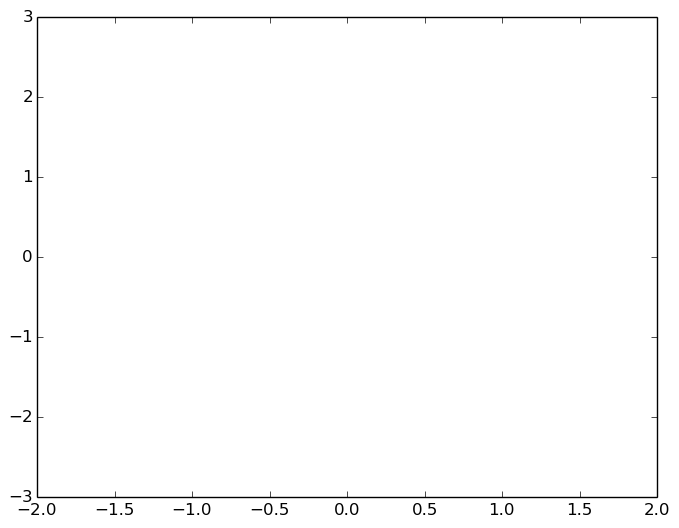

animate (generic function with 1 method)

In [8]:
fig = figure()
ax = axes(xlim=(-2,2), ylim=(-3,3))

global particle = ax[:plot]([], [], "go", lw=2)[1]
global trail = ax[:plot]([], [], "b-", lw=1)[1]

function init()
    global particle
    global trail
    
    particle[:set_data]([], [])
    trail[:set_data]([], [])
    
    
    return ([particle, trail], None)
end


function animate(i)
    global particle
    global trail
    
    trail[:set_data](χ₁[1:i+1], χ₂[1:i+1])
    particle[:set_data](χ₁[i+1], χ₂[i+1])
    return([particle, trail], None)
end

In [9]:
myanim = anim.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=true);
myanim[:save]("vanderpol.gif", writer="imagemagick", fps=30);

**Ogni volta che generate il gif**

1. Cancellate la caché del suo navigatore
2. Selezionate la cella di Markdown da sotto
3. Cliccate `Enter`
4. Finalmete cliccate `Shift` + `Enter`

`![anim](vanderpol.gif)`
![anim](vanderpol.gif)

state senza pensieri guagliù :-)